In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error, accuracy_score
import math

# Многоклассовая классификация

1. Загрузите из sklearn датасет с цифрами (каждый элемент кодирует изображение
цифры размером 8х8).

In [3]:
from sklearn.datasets import load_digits # импортируем датасет с цифрами из учебных датасетов sklearn

In [4]:
digit = load_digits()

2. Осмотрите данные и метки.

In [5]:
digit # представляет собой словарь

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [ ]:
digit.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

3. Попробуйте отобразить любое единичное изображение из набора с помощью
matplotlib.

In [6]:
im1 = digit['images'][1] # выбираем изображение из набора для дальнейшего отображения с помощью matplotlib

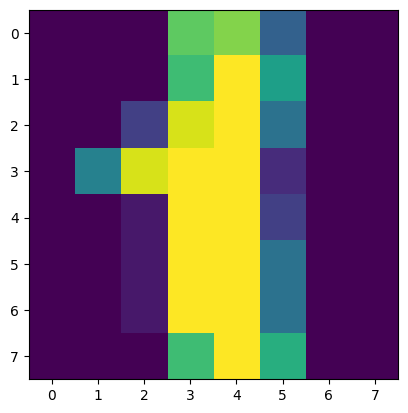

In [7]:
fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(im1)

4. Примените тетрадку с прошлого урока к загруженному датасету в части многоклассовой классификации.

In [8]:
X = digit.data
Y = digit.target

In [ ]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
Y

array([0, 1, 2, ..., 8, 9, 8])

In [9]:
from sklearn.linear_model import SGDClassifier # строим классификатор из коробки на этом датасете
# по дефолту SGDClassifier приспособлен для классификации 2 классов, но приняв наши данные, он сам понимает, сколько тут классов, и настраивает кол-во классификторов и функцию
SGDclf = SGDClassifier (random_state = 42)

In [10]:
SGDclf.fit(X,Y)

SGDClassifier(random_state=42)

In [ ]:
SGDclf.score(X,Y)

0.9699499165275459

In [11]:
pred = SGDclf.predict(X) # предсказываем метки на тестовом множестве

In [ ]:
cm = confusion_matrix(Y, pred) # матрица неточностей
cm # делаем вывод, что цифры 8 и 9 классификатор наиболее часто принимает за другие

array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 164,   1,   1,   0,   0,   0,   0,  14,   2],
       [  0,   0, 176,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0, 166,   0,   5,   0,   1,   8,   3],
       [  0,   1,   0,   0, 174,   1,   1,   1,   1,   2],
       [  0,   0,   0,   0,   0, 180,   0,   0,   1,   1],
       [  0,   0,   0,   0,   0,   0, 180,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 175,   1,   3],
       [  0,   1,   0,   0,   0,   0,   0,   0, 173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   3, 177]])

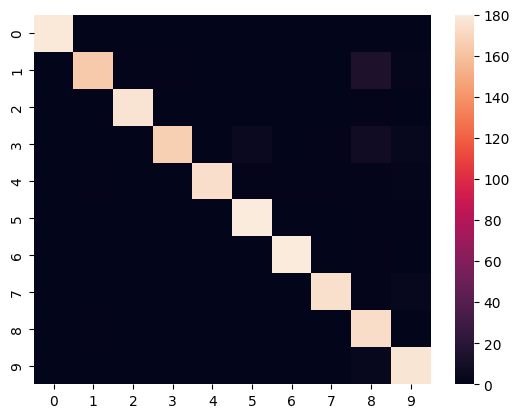

In [ ]:
sns.heatmap(cm);

In [ ]:
# макро считает метрики для каждой метки, берет среднее значение и возвращает
precision_score(Y,pred, average = 'macro'), recall_score(Y,pred, average = 'macro'), f1_score(Y,pred, average = 'macro') 

(0.9720937814810465, 0.9702604940886219, 0.9701342616961084)

### OvR

In [24]:
SGDclf.decision_function([X[149]]) # в нашем случае обучаются 10 классификаторов, получаем 10 значений

array([[-1620.5704734 , -2737.45016992, -4068.41238954, -1372.88101862,
        -3719.98932766,  -759.50902105, -4253.04399849, -2968.62984857,
         -600.77843692,   824.98806156]])

In [25]:
SGDclf.predict([X[149]])

array([9])

In [26]:
X[149]

array([ 0.,  0.,  6., 13., 10.,  4.,  0.,  0.,  0.,  4., 16., 15., 13.,
       13.,  0.,  0.,  0.,  4., 16., 14., 16., 16.,  1.,  0.,  0.,  2.,
       10., 16., 16., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  5.,
        0.,  0.,  0.,  0.,  0.,  0., 16.,  8.,  0.,  0.,  0.,  0.,  2.,
        8., 16.,  8.,  0.,  0.,  0.,  7., 16., 14.,  9.,  1.,  0.])

### OvO

In [28]:
from sklearn.multiclass import OneVsOneClassifier # используем другой классификатор

In [29]:
ovoSGD = OneVsOneClassifier(SGDClassifier(random_state = 42)) # передаем тот же самый линейный классификатор
ovoSGD.fit(X,Y)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [30]:
ovoSGD.decision_function([X[149]]) 

array([[4.33228105, 3.66670749, 1.66667633, 7.33332331, 0.66667455,
        7.33331125, 0.66667382, 2.6666764 , 7.33332185, 9.33332955]])

In [31]:
ovoSGD.predict([X[149]])

array([9])

In [32]:
pred = ovoSGD.predict(X)